# Imports 👇

In [100]:
import pandas
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot
%matplotlib inline

## Data Reading 👇

In [494]:
# this are the output classes, only two classes are there paitient will have stroke or not
classes_list=['Not_Failed','Failed']

In [327]:
data=pandas.read_csv('./Brain_failure_healthcare-dataset-stroke-data.csv')

In [328]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [329]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [330]:
data[data['gender']=="Male"].replace("Male",1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,1,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,1,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,1,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,1,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,1,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,1,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [331]:
data=data.replace("Male",1)
data=data.replace("Female",0)
data=data.replace("Other",0)


data=data.drop(['ever_married','work_type','Residence_type'],axis=1)

data=data.replace("never smoked",0)
data=data.replace("Unknown",0)
data=data.replace("formerly smoked",1)
data=data.replace("smokes",1)

In [332]:
data['bmi']=data['bmi'].fillna(value=data['bmi'].mean())
data['bmi']=data['bmi'].fillna(value=data['bmi'].mean())

In [333]:
data

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,202.21,28.893237,0,1
2,31112,1,80.0,0,1,105.92,32.500000,0,1
3,60182,0,49.0,0,0,171.23,34.400000,1,1
4,1665,0,79.0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,83.75,28.893237,0,0
5106,44873,0,81.0,0,0,125.20,40.000000,0,0
5107,19723,0,35.0,0,0,82.99,30.600000,0,0
5108,37544,1,51.0,0,0,166.29,25.600000,1,0


### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing
when we split the data set then their can be chances of all dead value rows can go in training and no row for the alive cases
hence at the time of model implementation model will only know the dead cases and not alive cases, that result in underfittiing ans will give high error at the time of prediction

In [469]:
shuffled_Data=data.sample(frac=1)

In [470]:
shuffled_Data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [471]:
failed_data=data[data['stroke']==1]

In [472]:
failed_data

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,202.21,28.893237,0,1
2,31112,1,80.0,0,1,105.92,32.500000,0,1
3,60182,0,49.0,0,0,171.23,34.400000,1,1
4,1665,0,79.0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...
244,17739,1,57.0,0,0,84.96,36.700000,0,1
245,49669,0,14.0,0,0,57.93,30.900000,0,1
246,27153,0,75.0,0,0,78.80,29.300000,1,1
247,34060,1,71.0,1,0,87.80,28.893237,0,1


In [473]:
not_failed_data=data[data['stroke']==0]

In [474]:
not_failed_data=not_failed_data.head(249)

In [475]:
Analysis_Data=pandas.concat([failed_data,not_failed_data],axis=0)

In [476]:
Analysis_Data=Analysis_Data.sample(frac=1)

In [477]:
Analysis_Data

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
248,43424,0,78.0,0,0,78.81,19.600000,0,1
74,19773,0,52.0,0,0,96.59,26.400000,0,1
221,68023,1,79.0,0,0,72.73,28.400000,0,1
474,9179,0,32.0,0,0,74.20,23.000000,1,0
24,4219,1,71.0,0,0,102.87,27.200000,1,1
...,...,...,...,...,...,...,...,...,...
81,26015,0,66.0,0,0,101.45,28.893237,0,1
142,8045,0,74.0,1,0,70.28,21.800000,0,1
120,68798,0,58.0,0,0,59.86,28.000000,1,1
412,44749,0,64.0,0,0,81.60,36.300000,1,0


## Splitting the dataset into training and testing 👇

For Training 80% data is being used and for testing 20% data is used from the given data

means 4088 rows will be used for training and 49 rows will be used for testing

In [478]:
Training_Data = Analysis_Data[:450]
Testing_Data = Analysis_Data[450:]

## dividing the training data features and labels 👇 
this will be used for training of logistic regression model

In [479]:
training_Labels=Training_Data['stroke']
training_Features=Training_Data.drop(['stroke'],axis=1)

In [480]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 248 to 86
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 450 non-null    int64  
 1   gender             450 non-null    int64  
 2   age                450 non-null    float64
 3   hypertension       450 non-null    int64  
 4   heart_disease      450 non-null    int64  
 5   avg_glucose_level  450 non-null    float64
 6   bmi                450 non-null    float64
 7   smoking_status     450 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.6 KB


## dividing the testing data features and labels 👇 
this will be used for testing the logistic regression model

In [481]:
testing_Labels=Testing_Data['stroke']
testing_Features=Testing_Data.drop(['stroke'],axis=1)

In [482]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 162 to 185
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48 non-null     int64  
 1   gender             48 non-null     int64  
 2   age                48 non-null     float64
 3   hypertension       48 non-null     int64  
 4   heart_disease      48 non-null     int64  
 5   avg_glucose_level  48 non-null     float64
 6   bmi                48 non-null     float64
 7   smoking_status     48 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 3.4 KB


# Creating the logistic regression model instance(object) 👇

In [483]:
model=LogisticRegression(max_iter=1000)

### fitting the model 👇

In [484]:
model.fit(training_Features,training_Labels)

LogisticRegression(max_iter=1000)

#### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

      Failed       0.73      0.65      0.69       226
  Not_Failed       0.69      0.76      0.72       224

    accuracy                           0.71       450
   macro avg       0.71      0.71      0.71       450
weighted avg       0.71      0.71      0.71       450



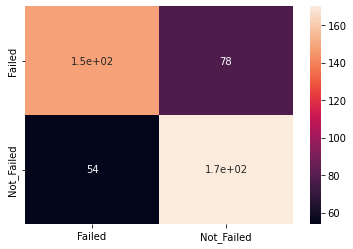

In [485]:
training_predicted_values=model.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

Training accuracy is 95%

# ________________________________________

# Now Testing the model 👇

In [486]:
predicted_values=model.predict(testing_Features)

In [487]:
predicted_values

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1], dtype=int64)

### Following will show that what is actual value and what is predicted by model 👇

In [488]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("          ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
           1  -->  0
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  1
           1  -->  1
           1  -->  0
           0  -->  0
           0  -->  0
           0  -->  1
           0  -->  1
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  1
           0  -->  0
           1  -->  0
           1  -->  1
           1  -->  0
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  1
           1  -->  0
           0  -->  0
           0  -->  1
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           1  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           1  -->  1
           1  -->  1
           1  -->  1
           1  -->  0

## plotting the confusion matrix for model of tested data 👇

In [489]:
classification_data=confusion_matrix(testing_Labels,predicted_values)

In [490]:
classification_data

array([[17,  6],
       [ 7, 18]], dtype=int64)

<AxesSubplot:>

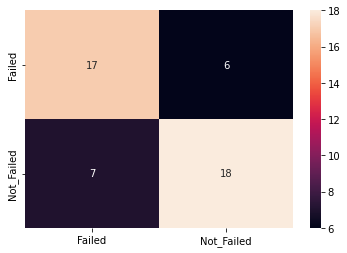

In [491]:
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)

## This is the calculation of accuracy of the model and precision of the respective classes 👇

In [492]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

      Failed       0.71      0.74      0.72        23
  Not_Failed       0.75      0.72      0.73        25

    accuracy                           0.73        48
   macro avg       0.73      0.73      0.73        48
weighted avg       0.73      0.73      0.73        48



## Testing on new Data 👇
for,


1) id: 123312    <br/>
2) gender: "Male" <br/>
3) age: 21  <br/>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  <br/>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease    <br/>
9) avg_glucose_level:  150   <br/>
10) bmi:  19 KG/(m*m)    <br/>
11) smoking_status: "never smoked"  <br/>



##### (Correct Output Should be Alive)

In [496]:
new_data=[123312,1,21,0,0,150,19,0]
print(classes_list[model.predict([new_data])[0]])

Not_Failed
